In [1]:
import numpy as np
import pandas as pd

In [2]:
url = ("http://hbiostat.org/data/repo/titanic3.xls")

df = pd.read_excel(url)
orig_df = df

### Inspect and Clean Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
df.shape

(1309, 14)

In [5]:
df.describe().iloc[:,:2]

,pclass,survived
count,1309.000000,1309.000000
mean,2.294882,0.381971
std,0.837836,0.486055
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,3.000000,1.000000
max,3.000000,1.000000


In [6]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [7]:
# To get percentage of missing values in a column
df.isnull().mean()*100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

In [8]:
df.isnull().sum(axis=1).loc[:20]

0     1
1     1
2     2
3     1
4     2
5     1
6     1
7     2
8     1
9     2
10    1
11    1
12    1
13    3
14    1
15    4
16    2
17    1
18    2
19    1
20    1
dtype: int64

In [9]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
mask = df.isnull().any(axis=1)
mask.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [11]:
df[mask].body.head()

0      NaN
1      NaN
2      NaN
3    135.0
4      NaN
Name: body, dtype: float64

In [12]:
df.sex.value_counts(dropna=False)

sex
male      843
female    466
Name: count, dtype: int64

In [13]:
df.embarked.value_counts(dropna=False)

embarked
S      914
C      270
Q      123
NaN      2
Name: count, dtype: int64

### Create Features

In [14]:
name = df.name

In [15]:
name.head(3)

0     Allen, Miss. Elisabeth Walton
1    Allison, Master. Hudson Trevor
2      Allison, Miss. Helen Loraine
Name: name, dtype: object

In [16]:
df = df.drop(columns=["name",
                      "ticket",
                      "home.dest",
                      "boat",
                      "body",
                      "cabin"])


In [17]:
df = pd.get_dummies(df, drop_first=True)

In [18]:
df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')

### Split Data

In [19]:
y = df.survived
X = df.drop(["survived"], axis = 1)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
X_train.isnull().sum()

pclass          0
age           187
sibsp           0
parch           0
fare            1
sex_male        0
embarked_Q      0
embarked_S      0
dtype: int64

### Impute Data

In [23]:
# To be used for missing value imputation
from sklearn.impute import SimpleImputer


In [24]:
imp_mode = SimpleImputer(missing_values = np.nan, strategy="median")
cols_to_impute = ["age", "fare"]
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

In [25]:
X_train.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

In [26]:
X_test.isnull().sum()

pclass         0
age           76
sibsp          0
parch          0
fare           0
sex_male       0
embarked_Q     0
embarked_S     0
dtype: int64

In [27]:
imp_mode = SimpleImputer(missing_values = np.nan, strategy="median")
cols_to_impute = ["age"]
X_test[cols_to_impute] = imp_mode.fit_transform(X_test[cols_to_impute])

In [28]:
X_test.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

### Normalize Data

In [29]:
# To be used for data scaling (normalizing)
from sklearn.preprocessing import StandardScaler

In [30]:
# easier way of building out a list when you have a lot of values/columns to add 
#cols = "pclass, age, sibsp, parch, fare".split(",")
cols = X_train.columns
cols

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q',
       'embarked_S'],
      dtype='object')

In [31]:
sca = StandardScaler()
X_train = sca.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=cols)
X_test = sca.transform(X_test)
X_test = pd.DataFrame(X_test, columns=cols)

In [32]:
X_train.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0.825248,-0.070918,-0.498616,-0.432553,-0.474092,0.739795,-0.330089,0.660104
1,0.825248,-0.232596,-0.498616,-0.432553,-0.488616,0.739795,-0.330089,0.660104
2,-0.363317,-0.798468,-0.498616,-0.432553,-0.145647,-1.351725,-0.330089,0.660104
3,0.825248,-0.070918,6.897852,1.805972,0.679370,-1.351725,-0.330089,0.660104
4,0.825248,-0.070918,-0.498616,-0.432553,-0.490904,-1.351725,-0.330089,0.660104


### Baseline Model

In [33]:
from sklearn.dummy import DummyClassifier
bm = DummyClassifier()
bm.fit(X_train, y_train)
bm.score(X_test, y_test) #accuracy

0.5699745547073791

In [34]:
from sklearn import metrics
metrics.precision_score(y_test, bm.predict(X_test))

C:\Users\timry\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

### Varioius ML Families

In [35]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost

from sklearn.model_selection import KFold, cross_val_score

for model in [DummyClassifier,
              LogisticRegression,
              DecisionTreeClassifier,
              KNeighborsClassifier,
              GaussianNB,
              SVC,
              RandomForestClassifier,
              xgboost.XGBClassifier
             ]:
    cls=model()
    kfold= KFold(n_splits=10)
    s= cross_val_score(cls, X, y, scoring="roc_auc", cv=kfold)
    
    print(f"{model.__name__:22} AUC: "
          f"{s.mean():.3f} STD: {s.std():.2f}")
    

DummyClassifier        AUC: 0.500 STD: 0.00
LogisticRegression     AUC: 0.843 STD: 0.03
DecisionTreeClassifier AUC: 0.766 STD: 0.03
KNeighborsClassifier   AUC: 0.837 STD: 0.04
GaussianNB             AUC: 0.819 STD: 0.03
SVC                    AUC: 0.837 STD: 0.05
RandomForestClassifier AUC: 0.847 STD: 0.04
XGBClassifier          AUC: 0.860 STD: 0.03


### Stacking

In [36]:
# Used sklearn StackingClassifier from class instead of the mlxtend.classifier from book

from sklearn.ensemble import StackingClassifier

clfs = [
    ('lr',LogisticRegression()),
    ('dtc', DecisionTreeClassifier()),
    ('kn', KNeighborsClassifier()),
    ('g', GaussianNB()),
    ('svc', SVC()),
    ('rfc', RandomForestClassifier())
    ]

stack = StackingClassifier(estimators=clfs,
                           final_estimator=LogisticRegression()
                          )

kfold = KFold(n_splits=10)

s = cross_val_score(stack, X, y, scoring="roc_auc", cv=kfold)

print(
    f"{stack.__class__.__name__} "
    f"AUC: {s.mean():.3f} STD: {s.std():.2f}"
)

StackingClassifier AUC: 0.865 STD: 0.03


### Create Model

In [37]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluate Model

In [38]:
rf.score(X_test, y_test)

0.7837150127226463

In [39]:
metrics.precision_score(y_test, rf.predict(X_test))

0.8

In [40]:
# create a feature importance list for the RandomForest model above
for col, val in sorted(zip(X_train.columns,
                           rf.feature_importances_),
                      key = lambda x: x[1],
                      reverse=True
                      )[:5]:
                        print(f"{col:10}{val:10.3f}")


fare           0.285
age            0.260
sex_male       0.237
pclass         0.089
sibsp          0.049


### Optimize Model

In [41]:
from sklearn.model_selection import GridSearchCV

rf4 = RandomForestClassifier()
params = {
    "max_features": [0.4, "auto"],
    "n_estimators": [15,200],
    "min_samples_leaf": [1, 0.1],
    "random_state" : [42]
    }

cv = GridSearchCV(rf4, params, n_jobs = -1).fit(X_train,y_train)

print(cv.best_params_)


{'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 15, 'random_state': 42}


In [42]:
rf5 = RandomForestClassifier(
    **{
        "max_features": 0.4,
        "min_samples_leaf": 1,
        "n_estimators": 15,
        "random_state" : 42
    })
rf5.fit(X_train, y_train)
rf5.score(X_test, y_test)
                            

0.7938931297709924

### Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix
y_pred = rf5.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[199,  25],
       [ 56, 113]], dtype=int64)

C:\Users\timry\anaconda3\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


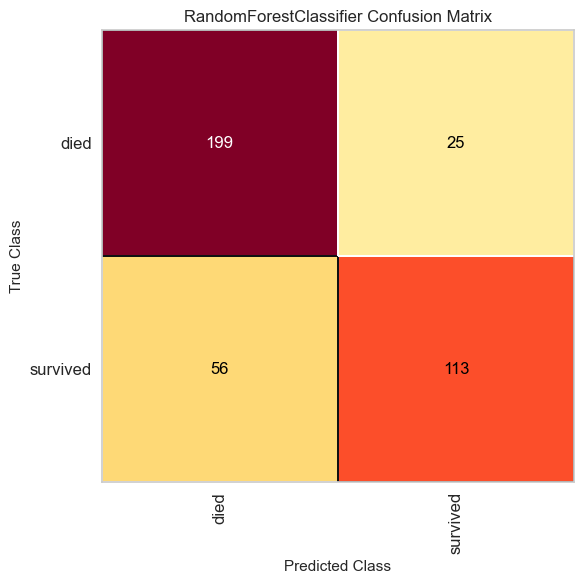

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [44]:
# using yellowbrick to create a confusion matrix plot

from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
mapping = {0: "died", 1: "survived"}
fig, ax = plt.subplots(figsize=(6,6))
cm_viz = ConfusionMatrix(
        rf5,
        classes=["died","survived"],
        label_encoder=mapping)

cm_viz.score(X_test, y_test)
cm_viz.poof()

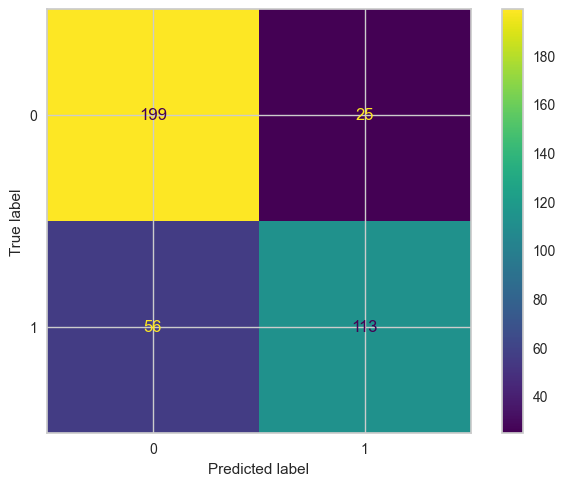

In [51]:
# Using sklearn to build a confusion matrix plot
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = rf5.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                              display_labels=mapping)
plt.show()



### ROC Curve

In [61]:
from sklearn.metrics import roc_auc_score

y_pred = rf5.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7785159551986475

C:\Users\timry\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


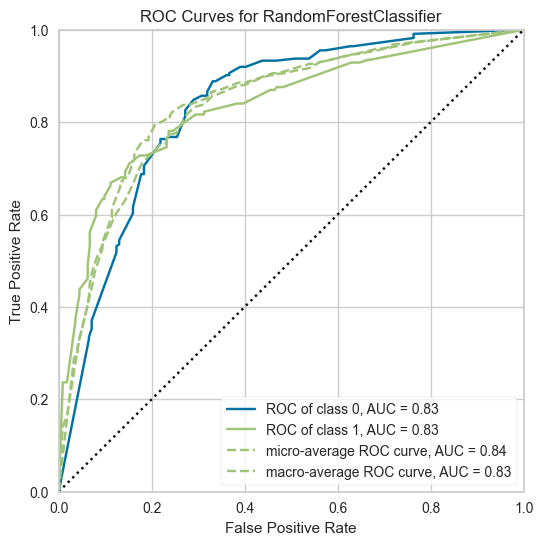

<function matplotlib.pyplot.show(close=None, block=None)>

In [64]:
# Create Roc-AUC curve plot using yellowbrick
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize=(6,6))
roc_viz = ROCAUC(rf5)
roc_viz.fit(X_train, y_train)
roc_viz.score(X_test, y_test)
roc_viz.poof()
plt.show

### Learning Curve

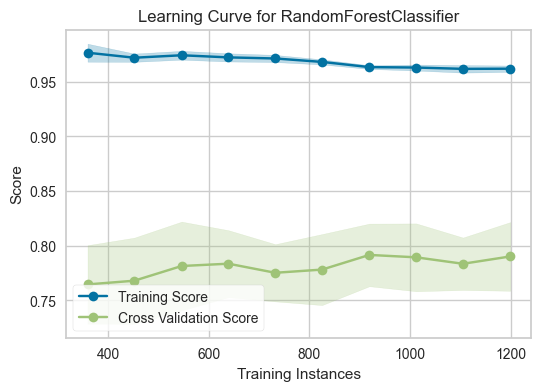

<Axes: title={'center': 'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [68]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve

fig, ax = plt.subplots(figsize=(6,4))
cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
lc_viz = LearningCurve(
    rf5,
    cv=cv,
    train_sizes = sizes,
    scoring="f1_weighted",
    n_jobs = 4,
    ax=ax
)

lc_viz.fit(X,y)
lc_viz.poof()


### Deploy Model

In [70]:
import pickle
pic = pickle.dumps(rf5)
rf6 = pickle.loads(pic)
y_pred = rf6.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7785159551986475

# Chapter 4

In [71]:
df.isnull().mean()*100

pclass         0.000000
survived       0.000000
age           20.091673
sibsp          0.000000
parch          0.000000
fare           0.076394
sex_male       0.000000
embarked_Q     0.000000
embarked_S     0.000000
dtype: float64